<a href="https://colab.research.google.com/github/rsbaye/Projects/blob/main/richmond_baye_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 254 Assignment 3

Before we start, please put your name in following format:

FirstName Lastname, netid //   e.g.) Safwan Wshah, swshah

To run your code:

*   Save your code to google drive, right click and open using google colab.
*   rename the assigmnent file to Yourfirstname_lastname_Assignment2.ipynb.
*   Under google drive root directory create the following folder and make sure all your assignments are under this directory (CS254/CS254-Assignments/yournetid-A#). For example, for assignment #3 it should look like this 
CS254/CS254-Assignments/swshah-A3



To submit, please follow the following steps:
*   Zip your assignment and name it yournetid-A#.zip For example for assignment 2, it should be swshah-A3.zip.
* Submit to blackboard. 

### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from past.builtins import xrange
from scipy.special import expit

%matplotlib inline

Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:


['yourfirst_last_name_Assignment_3.ipynb', 'data', 'images']

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/CS254-Assignments/rbaye-A3' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['data', 'images', 'richmond_baye_Assignment_3.ipynb']


# Part 1(Logistic regression without regularization)

In this exercise, you will implement logistic regression and apply it to the Iris dataset found under data directory.

In the Iris dataset there are two continuous variables named "PetalLengthCm" and "PetalWidthCm". The type of flower associated with these features is assigned in the "species" column. Setosa is labeled as 0 and Versicolor is labeled as 1. Your task will be to classify between these two types of flowers using logistic regression.


### Part 1, Linear Logistic Regression 

1. [5 points] If you have Setosa labeled as 0 and Versicolor is labeled as 1, what is the logistic regression output mean (in words) for a given sample?

In [ ]:
# If h(x) is 0, the classification is setosa
# If h(x) is 1, the calssification is Versicolor

2. [5 points] Load the data and split it into X(feature vectors) and Y(target/output vectors).

In [ ]:
#  Load Iris dataset
# This dataset can be found in the "data" folder
# note that the data has a header and you don't need to specify the header information when you load it.

path = GOOGLE_DRIVE_PATH + '/data/Iris.csv'
data = pd.read_csv(path, names=["id","PetalLengthCm", "PetalWidthCm", "species"], header=0)

#display part of the dataset. 
display(data.head())

,id,PetalLengthCm,PetalWidthCm,species
0,1,1.4,0.2,0
1,2,1.4,0.2,0
2,3,1.3,0.2,0
3,4,1.5,0.2,0
4,5,1.4,0.2,0


3. [5 points] Load the data and split it into X(feature vectors) and Y(target/output vector). Add columon of "ones" to X and convert both of them to numpy arrays.

In [ ]:
# Add a column of ones to the data for the intercept
cols = data.shape[1]

# seperate data into X, Y and convert them to numpy arrays.
# you might need to reshape Y to convert it to a matrix of (100, 1) diminsions. 
X = data.iloc[:,1:cols-1]
Y = data.iloc[:,cols-1:cols]

X.insert(0,"Ones", 1)
# Convert X and Y to NumPy arrays
X = X.to_numpy()
Y = Y.to_numpy()

print("X shape =", X.shape,", Y shape =", Y.shape, "X type =", type(X), "Y type =", type(Y))
#results should be "X shape = (100, 3) , Y shape = (100, 1) 
#X type = <class 'numpy.ndarray'> Y type = <class 'numpy.ndarray'>"


X shape = (100, 3) , Y shape = (100, 1) X type = <class 'numpy.ndarray'> Y type = <class 'numpy.ndarray'>


This code will visualize your data.

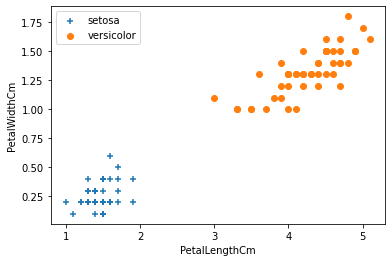

In [ ]:
# access class-based data
setosa = data.loc[data['species'] == 0]
versicolor = data.loc[data['species'] == 1]

# data plotting and specifications
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], marker = "+")
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], marker = "o")

# labeling specification
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

# legend and show calls
plt.legend(["setosa", "versicolor"])
plt.show()

4. [5 points] Comment on the data. Is it linearly separable? What are the dimensions of the hypothesis hyperplane for this data?

In [ ]:
#The data is linearly seperable. One can simply seperate them with a line and the dimension will be simply 1

5. [10 points] Before you start with the logistic regression implementation, you need to first implement the hypothesis function, then the cost function and the gradient descent algorithm. Test it when you are finished. Try testing a few values by calling hypothesis(x). For large positive values of x, the hypothesis should be close to 1, while for large negative values, the hypothesis should be close to 0. Evaluating hypothesis(0) should give you exactly 0.5.
The equation for sigma is 

![alt_text](https://drive.google.com/uc?id=1Xryr8KESDE0yE3Bu6fDKgQYG6c6nTALO)




In [ ]:
X = np.array(X)
def hypothesis(X, theta):
  z = np.dot(X, theta)
  h = 1 / (1 + np.exp(-z))
  return h

In [ ]:
# this is a test function for the hypothesis function implemented above.
X = np.array(X).reshape(-1, 3)
theta = np.zeros((X.shape[1], 1)) #create a numpy array for zeros.
h = hypothesis(X, theta)
print (h.shape) # this should be (100, 1)
print (h[0]) # this should be 0.5 for all values in h

(100, 1)
[0.5]


6.  [10 points] Implement a logistic regression cost function (calcLogRegressionCost).

The vectorized equation for the cost function is given below for your convenience.  


![alt_text](https://drive.google.com/uc?id=1ENf1ovYLaC7Bqe7yXuZnEpR0jJ9onzgE)



In [ ]:
def calcLogRegressionCost(X, y, theta):
    
    """
    Calculate Logistic Regression Cost
    
    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    output: return the cost value.
    """
    # cost = add code here
    m = y.shape[0]# extract the number of rows in a numpy array y
    h = hypothesis(X, theta)
    cost = -1 / m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost


In [ ]:
#This is a test function that will call "calcLogRegressionCost" using the theta initial parameters (zeros). 
# You should get about 0.693.
theta = np.zeros((X.shape[1], 1))
print(calcLogRegressionCost(X, Y, theta))

# Desired output: 0.693...

[[0.69314718]]


7.  [5 points] Is there a difference between the gradient descent algorithm for linear regression and logistic regression? If yes, what is the difference?

In [ ]:
#Yes there is a difference betweeen the gradient descent algorithm for a linear regression and the logistic regression. The difference lies the binary nature of the logistic cost fucntion and its non-linear. And this only leave if y = predicted = 1.

8.  [15 points] Implement a logistic Regression Gradient Descent algorithm (logRegressionGradientDescent).

The vectorized equation for the logisitc Regression Gradient Descent algorithm is given below for your convenience.

![alt_text](https://drive.google.com/uc?id=1qZ1v-PpGtOTAVujxhYNOCuwmzHEF-FRE)


In [ ]:

def logRegressionGradientDescent(X, Y, theta, eta, iters): 
    """
    Performs gradient descent optimization on a set of data
    
    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    eta: learning rate
    iters: number of times to iterate the algorithm (epochs)
    output: return optimized theta and the cost array for each iteration (epoch). 
    """

    
    m = len(Y)
    cost = np.zeros((iters, 1))
    
    for i in range(iters):
        h = hypothesis(X, theta)
        theta = theta - (eta/m) * np.dot(X.T, (h-Y))*2
        cost[i] = calcLogRegressionCost(X, Y, theta)
    
    return theta, cost


9. [5 Points] As you have the gradient decent algorithm implemented, run the gradient descent algorithm to fit your parameters theta to the training set.

In [ ]:
# this is a test function for logRegressionGradientDescent function. You can change eta and iters 
# but you will not get the values given below.
eta = 0.1
iters = 10000
theta = np.zeros((X.shape[1], 1))
theta, cost = logRegressionGradientDescent(X, Y, theta, eta, iters)
print(calcLogRegressionCost(X, Y, theta))
print( theta)

# you should get these values
# For cost [[0.00358296]]
# For theta [[-11.73342243]
#  [  3.24410413]
#  [  4.8722057 ]]


[[0.00358296]]
[[-11.73342243]
 [  3.24410413]
 [  4.8722057 ]]



10. [5 Points] Plot the cost by the number of epochs. Is it as expected, why or why not ? What is the best learning rate you chose, and why ?

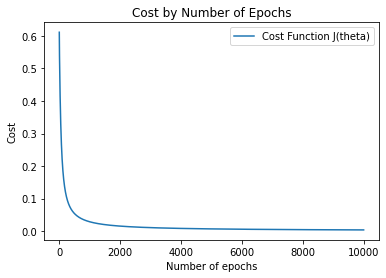

In [ ]:
# write your code here ... 

plt.plot(range(iters), cost, label='Cost Function J(theta)')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.title('Cost by Number of Epochs')
plt.legend()
plt.show()


#The cost function is expected to be a decreasing function so this is expected because the gradient descent algorithm minimises it. The 
#The best learning rate is at the point where the cost fucntion is minimum say 0.04

11. [5 Points] Suppose that the petal length is 4.5 and petal width is 1.5. Using the hypothesis function, find the probability of this sample being a versicolor.

In [ ]:
x_new = np.array([[1, 4.5, 1.5]])
# write your code here.
probability = hypothesis(x_new, theta)
print(probability)
#the probability of the sample is 0.99. this means it belongs to the 1 class since its closser to 1


[[0.99996183]]


This code will plot the decision boundary with respect to the data. The plot will include PetalLengthCm in the X-axis and PetalWidthCm in the Y-axis. Additionally, assign '+' for Setosa points and 'o' for versicolor points. The decision boundary separates the classes using the optimal theta found in the answer in the previous questions.

In [ ]:
def plotData(feature1, feature2, label1, label2, feature1AxisLabel, feature2AxisLabel):
    plt.figure(figsize=(10,6))
    plt.plot(feature1[:,1], feature1[:,2], 'ko', label=label1)
    plt.plot(feature2[:,1], feature2[:,2], 'r+', label=label2)
    plt.xlabel(feature1AxisLabel)
    plt.ylabel(feature2AxisLabel)
    plt.legend()
    plt.grid()

In [ ]:
def plotDecisionBoundary(X, theta):
    
    # this will find min,max x values and solve for y = 0 at those positions
    boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
    boundary_ys = -1 * (-.5 + theta[0] + theta[1]*boundary_xs) / theta[2]
    
    # plot points
    plt.plot(boundary_xs, boundary_ys, 'b-', label='Decision Boundary')

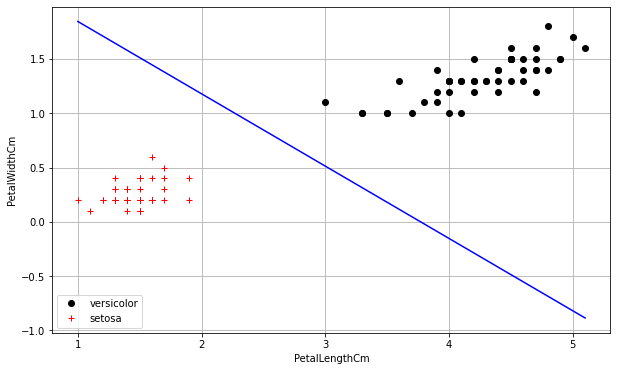

In [ ]:
pos = np.array([X[i] for i in xrange(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in xrange(X.shape[0]) if Y[i] == 0])

plotData(pos, neg, "versicolor", "setosa", 'PetalLengthCm', 'PetalWidthCm')
plotDecisionBoundary(X, theta)

12. [5 Points] Is what you see in the previous figure is what you expected to see? Justify your answer.

In [ ]:
#This was expected although this was not what was produced in the earlier figure. this time we introduced a line of seperation with a dimension of 1. 

# Assignment 3 - Part 2 (Nonlinear and Regularized Logistic regression)

In this part, you will be asked to implement a Nonlinear and Regularized Logistic regression using Ridge Regularization. To do this you need to work on the ex2data2.txt dataset found under the data directory. In this dataset, there are two continuous independent variables - “Test 1” and “Test 2”. Our target variable is binary and labeled 0(did not passed the test) or 1(passed the test).

In this part of the assignment, you will build a logistic regression model to predict whether a sample passed the test or not (a model that estimates the probability of passing based on test 1 and test 2).

1. [5 Points] Load the data and split it into X(feature vectors) and Y(target/output vectors). Add a column of "ones" to X and convert both of them to numpy arrays. (You can follow the steps from part1)

In [ ]:
dir_path = GOOGLE_DRIVE_PATH_AFTER_MYDRIVE + '/data/ex2data2.txt'
# add your code here ...
path = GOOGLE_DRIVE_PATH + '/data/ex2data2.txt'
df = pd.read_csv(path, sep= ",", header=None)
  
#name columns 
df.columns = ["Test 1", "Test 2", "Target"]
df.insert(0, "Ones", 1)

cols = df.shape[1]

X = df.iloc[:,0:cols-1]
Y = df.iloc[:,cols-1:cols]

# Convert X and Y to NumPy arrays
X = X.to_numpy()
Y = Y.to_numpy()

print("X shape =", X.shape,", Y shape =", Y.shape, "X type =", type(X), "Y type =", type(Y))


X shape = (118, 3) , Y shape = (118, 1) X type = <class 'numpy.ndarray'> Y type = <class 'numpy.ndarray'>


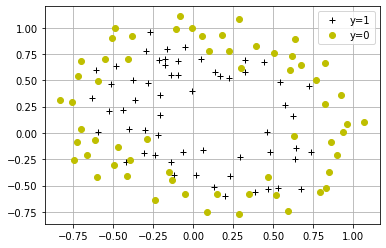

In [ ]:
# this code will visualize your data, test 1 will be in the X-axis,
# test 2 will be on the Y-axis.
# we assigned '+' for pass and 'o' for fail
# your asnwer should look the figure below
pos = np.array([X[i] for i in xrange(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in xrange(X.shape[0]) if Y[i] == 0])

def plotData(pos, neg):
    
    plt.plot(pos[:,1], pos[:,2], 'k+', label='y=1')
    plt.plot(neg[:,1], neg[:,2], 'yo', label='y=0')
    
    plt.legend()
    plt.grid()
    
plotData(pos, neg)

2. [5 Points] As you might have noticed, this data is non-linearly separable. Therefore, we have to transform our features with PolynomialFeatures from sklearn. 

You will need to create a PolynomialFeatures object <b>(with the degree hyperparam set to 6)</b> which we will denote as the variable "poly". Then you need to transform the data using this object that you have created. Use the docs to assist you with understanding and implementing your code https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
Note: please note that you are going to apply polynomials only on the original features without the added column of ones, as the sklearn PolynomialFeatures automatically adds a "ones" column to the output transformed X (No need to add "ones" after you transform using sklearn PolynomialFeatures).

In [ ]:
#poly = add your code here
#X_poly = add your code here 

from sklearn.preprocessing import PolynomialFeatures
X = np.delete(X, 0,1)
poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)


In [ ]:
#This part is given for testing purpose, you can change eta and iters to different values
# but you are not going to have same cost[0] reported below. 
eta = 0.5
iters = 10000

theta_poly_init = np.zeros((X_poly.shape[1], 1))  
theta_poly, cost = logRegressionGradientDescent(X_poly, Y, theta_poly_init, eta, iters)
print (cost[0]) # cost [0] should be 0.6812373150879889

[0.68123732]


3. [5 Points] Plot the cost vs iterations. Comment on the graph.

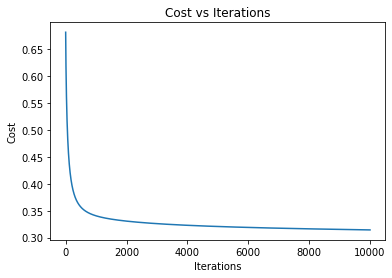

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(iters), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

#Again the cost function is decreasing because the logistic gradient descent for the polynomial minimises the cost fucntion. Note that the cost function levels off at some point.


This code will plot the decision boundary of the polynominal features. Use logRegressionGradientDescent for plotting the decision boundary.

In [ ]:
def plotBoundary(theta, X, Y, poly, eta, iters):

    # find optimal thetas
    theta, cost = logRegressionGradientDescent(X, Y, theta, eta, iters)
    
    # create search space and placeholder
    xvals = np.linspace(-1, 1.5, 100)
    yvals = np.linspace(-1, 1.5, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    # compute zval for all combinations of xvals/yvals
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            featuresij = poly.fit_transform(np.array([[xvals[i], yvals[j]]]))
            zvals[j][i] = np.dot(theta.T, featuresij.T)
    
    
    contour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary ")

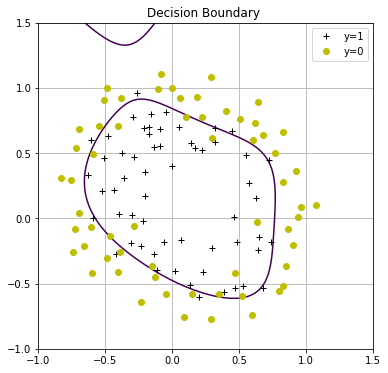

In [ ]:
plt.figure(figsize=(6,6))
plotData(pos, neg)
plotBoundary(theta_poly, X_poly,Y,poly, eta, iters)

#The decision bounary clearly seperates y =1 from y = 0. There is no overfitting in this case. However, there could be a problem of underfitting in this case. One will have to apply a regularization technique to solve this problem.

  4. [5 Points] Comment on the decision boundary. Is the decision boundary behaving as expected? Try higher and lower polynomial degrees and comment on the differences.

### Part 3, For Graduate Students , Extra Cridet for Undergraduates -  [30 pts]

 Regularization is an important way to fit the data more accurately. Before going further, you need to implement the Ridge regularized gradient descent for logistic regression with its corresponding regularized cost function.



1. [10 Points] Implement the Ridge Regularized Logistic Regression cost function named calcLogRegressionCostR following the given equation.



![alt_text](https://drive.google.com/uc?id=1YW2f_S5PdoJuCrR3Vw7Lp4seYRN6-5Yq)


In [ ]:
def calcLogRegressionCostR(X, Y, theta, alpha):
    # X : feature vector
    # Y : target vector/ output vector
    # theta : weight vector
    # alpha : regularization parameter
    
    # add your code here ...
    X = np.delete(X, 0,1)
    m = len(Y)
    h = 1 / (1 + np.exp(-np.dot(X, theta)))
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - Y).T, np.log(1 - h))) + (alpha / (2 * m)) * np.sum(theta[1:]**2)
    return cost


2. [10 Points] Implement logRegressionGradientDescentR . This should be ridge regularized. The equation is 

![alt_text](https://drive.google.com/uc?id=1j2pR4dNGcmPtYWr_a04FV3gLlx0aKpN2)


In [ ]:
from numpy.lib.function_base import gradient

def logRegressionGradientDescentR(X, Y, theta, eta, iters, alpha):
    """
    Caculating gradients and updating thetas through gradient descent loop with regularization
    
    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    eta: learning rate
    iters: number of epochs for updating theta
    alpha: regularization term
    return optimized theta and cost
    """
    # add your code here 
    cost = np.zeros(iters)
    for i in range(iters):
      h = hypothesis (X, theta)
      gradient = (2/len(X)*np.dot(X.T,(h-Y))+ alpha*theta)
      theta = theta- eta *gradient
      cost[i] = calcLogRegressionCost(X, Y, theta)
    return theta, cost

In [ ]:
def plotBoundaryR(theta, X, Y, poly, eta, iters, alpha):

    # find optimal thetas
    theta, cost = logRegressionGradientDescentR(X, Y, theta, eta, iters, alpha)
    
    # create search space and placeholder
    xvals = np.linspace(-1, 1.5, 100)
    yvals = np.linspace(-1, 1.5, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    # compute zval for all combinations of xvals/yvals
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            featuresij = poly.fit_transform(np.array([[xvals[i], yvals[j]]]))
            zvals[j][i] = np.dot(theta.T, featuresij.T)
    
    
    contour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary with Alpha = " + str(alpha))

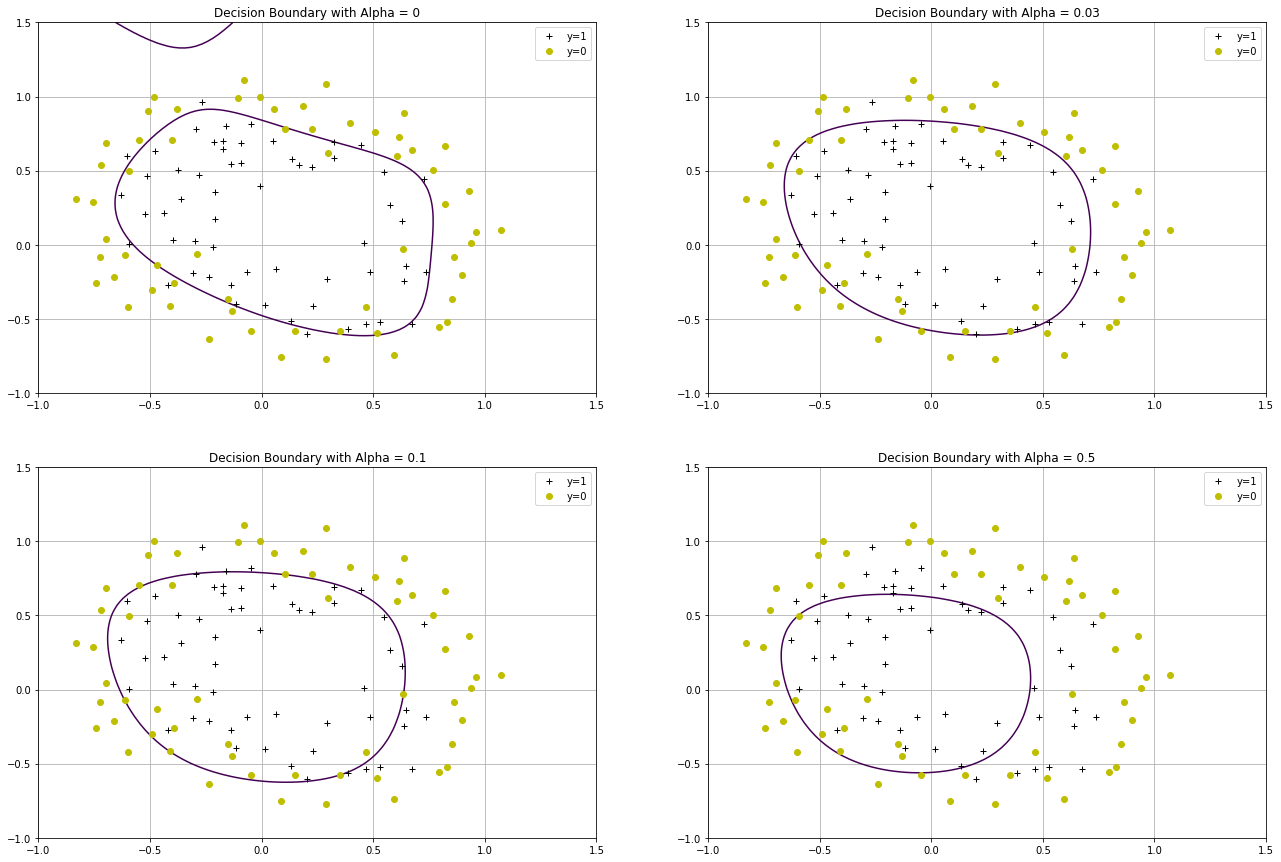

In [ ]:
#This code will visualize the boundaries for different values of alpha.

alpha_vals = [0, 0.03, 0.1, 0.5]
plt.figure(figsize=(22,15))

for i in range(4):
    plt.subplot(221 + i)
    plotData(pos, neg)
    plotBoundaryR(theta_poly, X_poly, Y, poly, eta, iters, alpha=alpha_vals[i])


3. [10 Points] Comment on the figures above. What is the best combination of polynomial and regularization that works the best, and why?

In [ ]:
# The essence of adding the regularization term (ridge regression) is to reduce overfitting. As shown lower alpha (0 and 0.003) seem to fit the training data well. however, higher alpha values like 0.5 explodes the model. 
#An ideal alpha will be 0.03